In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv("../data/evaluation_data_final.csv")

In [3]:
map = {
    "Decision Tree": "Decison Tree",
    "Random Forest": "Random Forest",
    "LSTM": "LSTM"
}
def mapper(x):
    
    for val in map.keys():
        if val in x:
            return map[val]
    return None
    
df['type'] = df['Model'].apply(mapper)

metrics = ['Runtime', 'Accuracy', 'F1']

mean_data = df.groupby("type")[metrics].mean()
mean_data

,Runtime,Accuracy,F1
type,,,
Decison Tree,7.965,0.703332,0.694809
LSTM,6011.540,0.805876,0.764753
Random Forest,25.645,0.867149,0.866338


In [4]:
bbc = df[df['data']=="bbc news"].set_index("Model")
sarc = df[df['data']=="sarcasm detection"].set_index("Model")

df['fine_tune'] = df['Model'].apply(lambda x: "fine-tuned" in x)
simple = df[df['fine_tune'] == False].set_index("Model")
fine_tuned = df[df['fine_tune'] == True].set_index("Model")

In [5]:
simple

,Runtime,Accuracy,F1,data,type,fine_tune
Model,,,,,,
Decision Tree,0.73,0.849438,0.849514,bbc news,Decison Tree,False
Decision Tree,14.38,0.730084,0.729078,sarcasm detection,Decison Tree,False
Random Forest,0.42,0.970787,0.970774,bbc news,Random Forest,False
Random Forest,10.27,0.767121,0.764883,sarcasm detection,Random Forest,False
LSTM,402.97,0.957303,0.957100,bbc news,LSTM,False
LSTM,138.59,0.790881,0.790951,sarcasm detection,LSTM,False


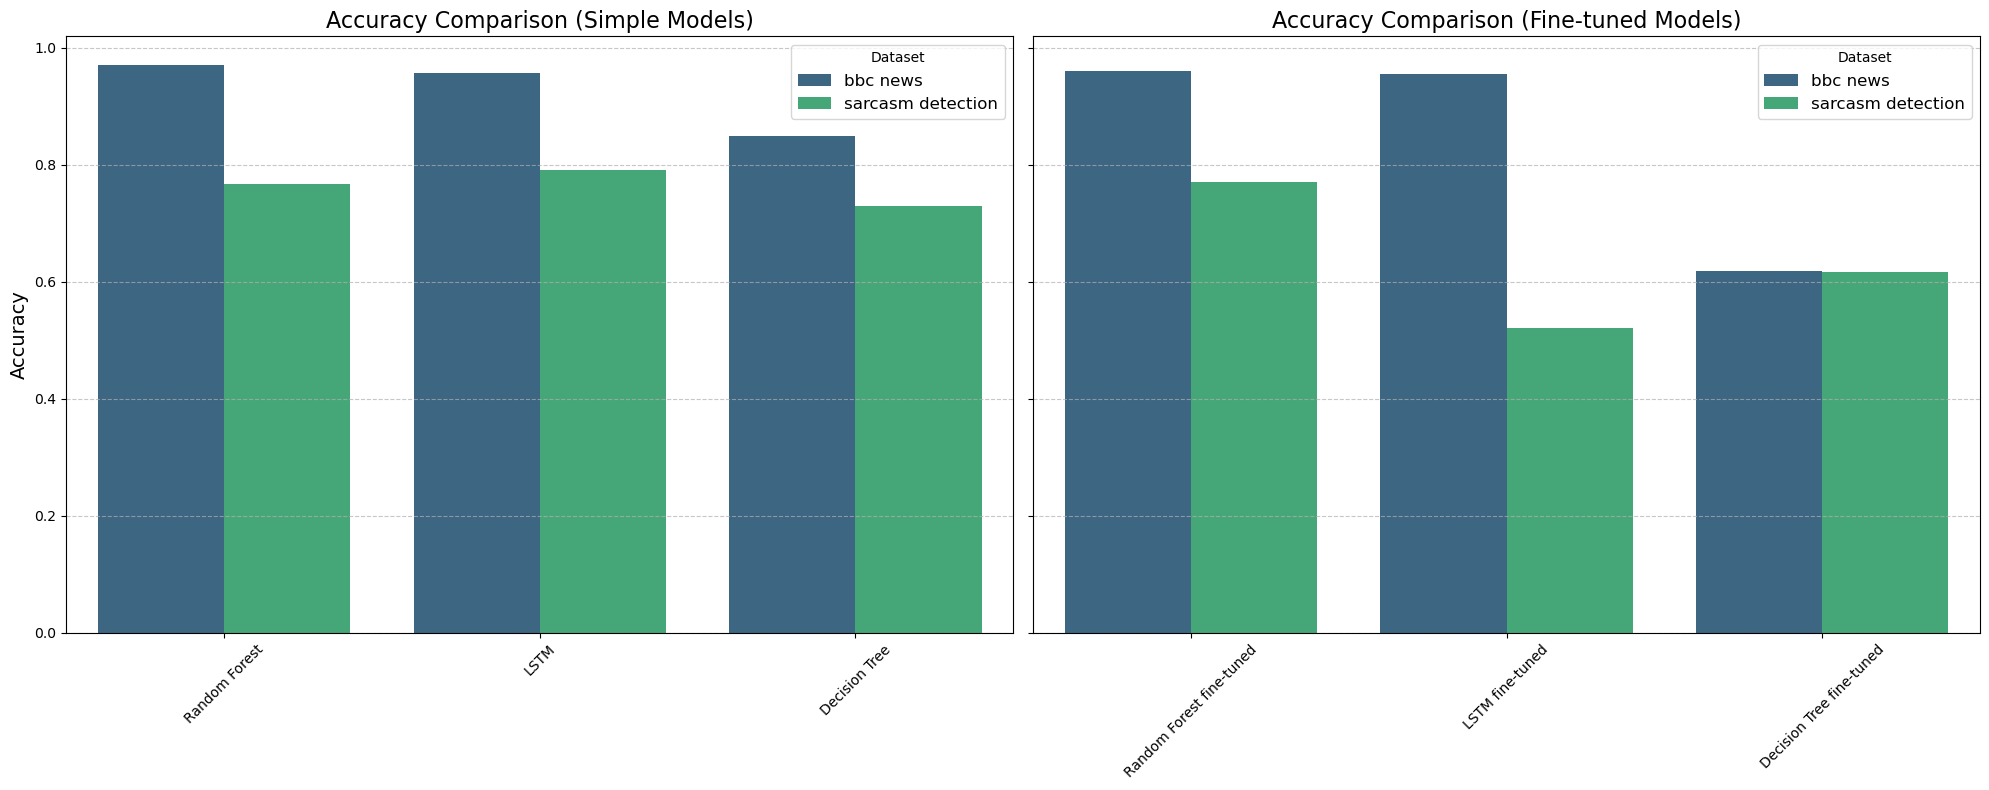

In [6]:
simple_sorted = simple.sort_values(by='Accuracy', ascending=False)
fine_tuned_sorted = fine_tuned.sort_values(by='Accuracy', ascending=False)

# Create the subplots
fig, axes = plt.subplots(1, 2, figsize=(20, 8), sharey=True)

# Plot for simple models
sns.barplot(data=simple_sorted, x=simple_sorted.index, y="Accuracy", hue="data", palette="viridis", ax=axes[0])
axes[0].set_title('Accuracy Comparison (Simple Models)', fontsize=16)
axes[0].set_xlabel('')
axes[0].set_ylabel('Accuracy', fontsize=14)
axes[0].tick_params(axis='x', rotation=45)
axes[0].grid(axis='y', linestyle='--', alpha=0.7)
axes[0].legend(title='Dataset', fontsize=12)

# Plot for fine-tuned models
sns.barplot(data=fine_tuned_sorted, x=fine_tuned_sorted.index, y="Accuracy", hue="data", palette="viridis", ax=axes[1])
axes[1].set_title('Accuracy Comparison (Fine-tuned Models)', fontsize=16)
axes[1].set_xlabel('')
axes[1].set_ylabel('')  # No y-label as it's shared
axes[1].tick_params(axis='x', rotation=45)
axes[1].grid(axis='y', linestyle='--', alpha=0.7)
axes[1].legend(title='Dataset', fontsize=12)

plt.tight_layout()

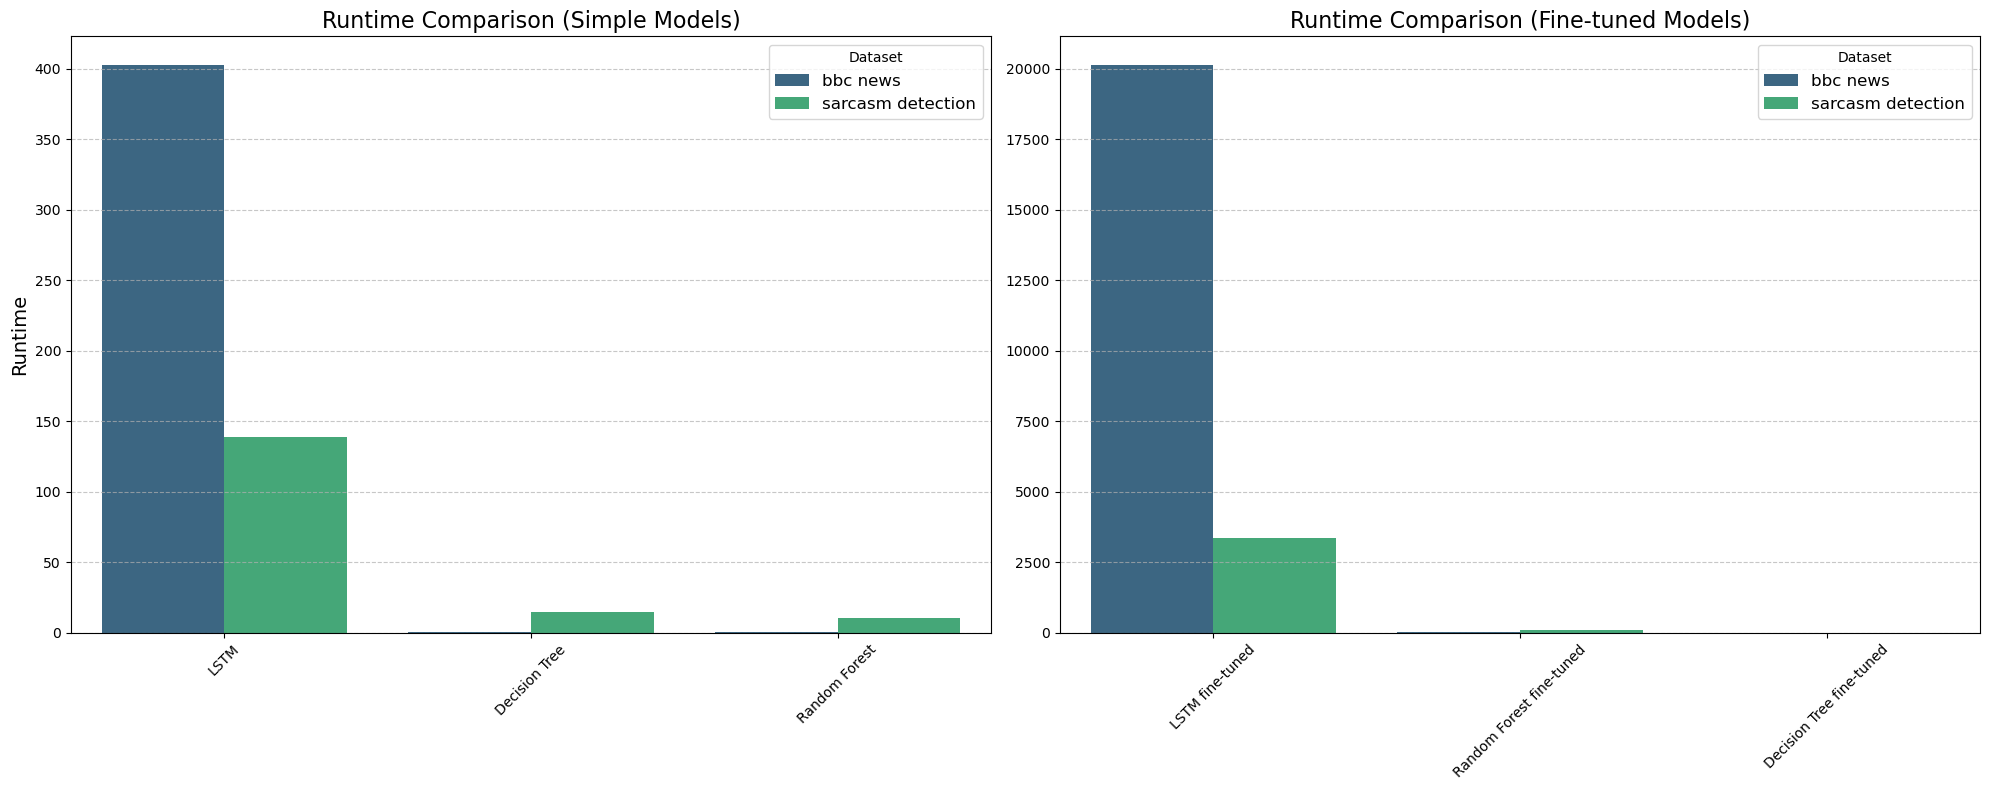

In [7]:
simple_sorted = simple.sort_values(by='Runtime', ascending=False)
fine_tuned_sorted = fine_tuned.sort_values(by='Runtime', ascending=False)

# Create the subplots
fig, axes = plt.subplots(1, 2, figsize=(20, 8))

# Plot for simple models
sns.barplot(data=simple_sorted, x=simple_sorted.index, y="Runtime", hue="data", palette="viridis", ax=axes[0])
axes[0].set_title('Runtime Comparison (Simple Models)', fontsize=16)
axes[0].set_xlabel('')
axes[0].set_ylabel('Runtime', fontsize=14)
axes[0].tick_params(axis='x', rotation=45)
axes[0].grid(axis='y', linestyle='--', alpha=0.7)
axes[0].legend(title='Dataset', fontsize=12)

# Plot for fine-tuned models
sns.barplot(data=fine_tuned_sorted, x=fine_tuned_sorted.index, y="Runtime", hue="data", palette="viridis", ax=axes[1])
axes[1].set_title('Runtime Comparison (Fine-tuned Models)', fontsize=16)
axes[1].set_xlabel('')
axes[1].set_ylabel('')  # No y-label as it's shared
axes[1].tick_params(axis='x', rotation=45)
axes[1].grid(axis='y', linestyle='--', alpha=0.7)
axes[1].legend(title='Dataset', fontsize=12)

plt.tight_layout()

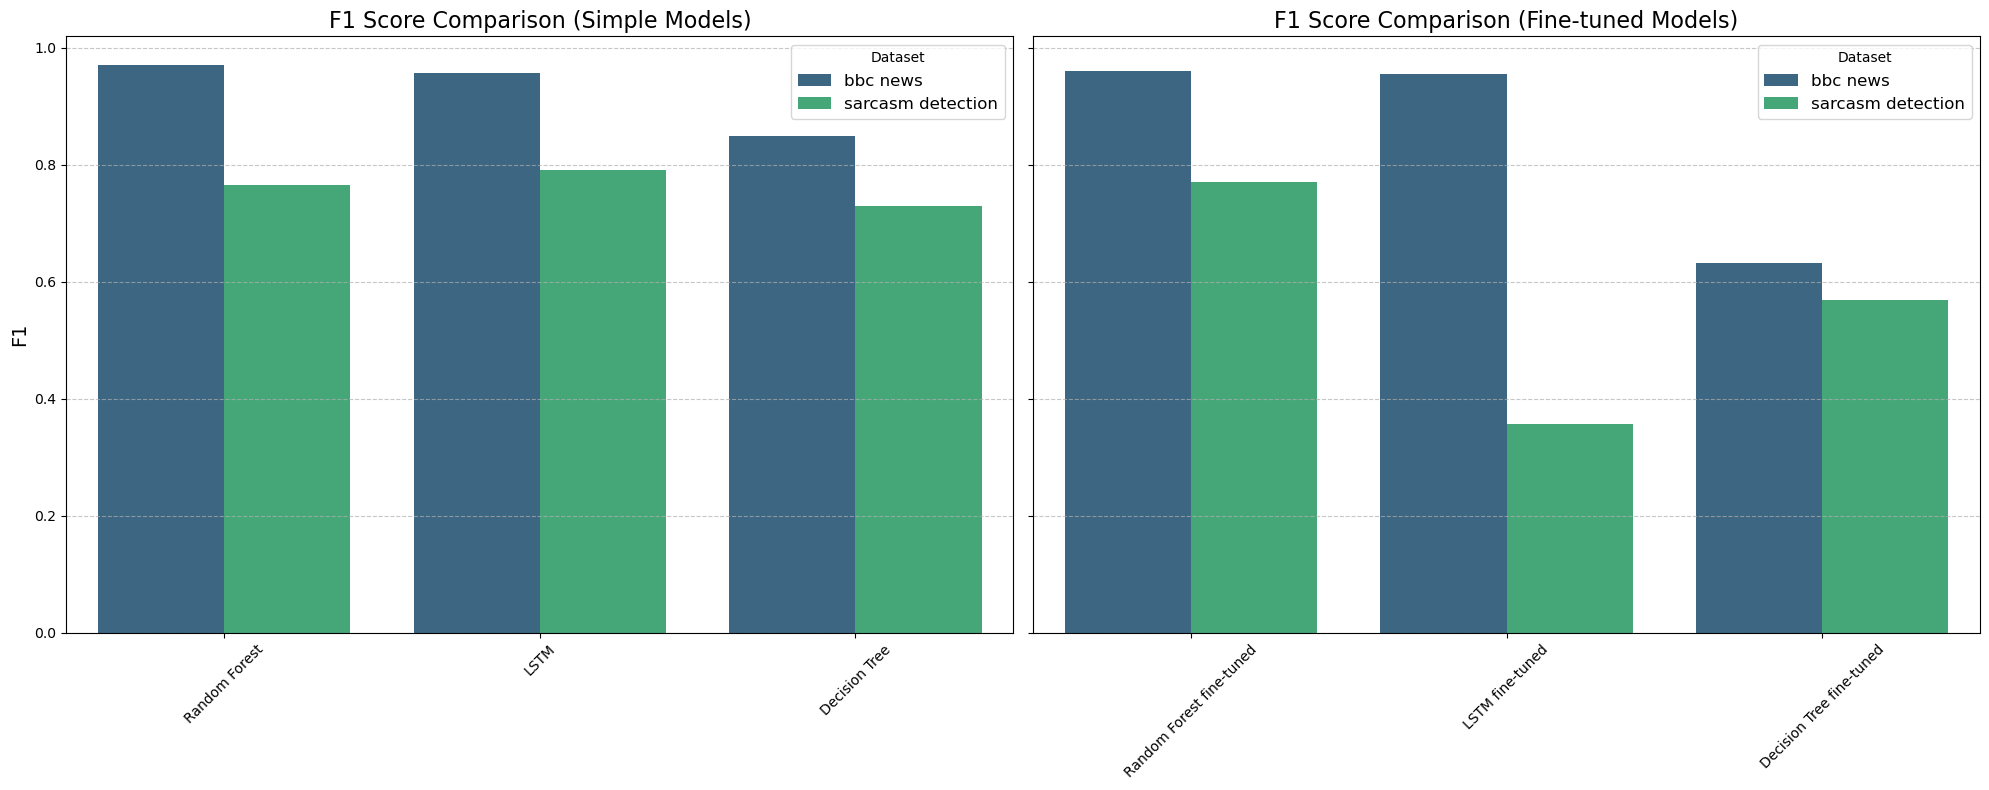

In [8]:
simple_sorted = simple.sort_values(by='F1', ascending=False)
fine_tuned_sorted = fine_tuned.sort_values(by='F1', ascending=False)

# Create the subplots
fig, axes = plt.subplots(1, 2, figsize=(20, 8), sharey=True)

# Plot for simple models
sns.barplot(data=simple_sorted, x=simple_sorted.index, y="F1", hue="data", palette="viridis", ax=axes[0])
axes[0].set_title('F1 Score Comparison (Simple Models)', fontsize=16)
axes[0].set_xlabel('')
axes[0].set_ylabel('F1', fontsize=14)
axes[0].tick_params(axis='x', rotation=45)
axes[0].grid(axis='y', linestyle='--', alpha=0.7)
axes[0].legend(title='Dataset', fontsize=12)

# Plot for fine-tuned models
sns.barplot(data=fine_tuned_sorted, x=fine_tuned_sorted.index, y="F1", hue="data", palette="viridis", ax=axes[1])
axes[1].set_title('F1 Score Comparison (Fine-tuned Models)', fontsize=16)
axes[1].set_xlabel('')
axes[1].set_ylabel('')  # No y-label as it's shared
axes[1].tick_params(axis='x', rotation=45)
axes[1].grid(axis='y', linestyle='--', alpha=0.7)
axes[1].legend(title='Dataset', fontsize=12)

plt.tight_layout()

In [9]:
mean_data = mean_data.reset_index()
mean_data_runtime_sorted = mean_data.sort_values(by='Runtime')
mean_data_accuracy_sorted = mean_data.sort_values(by='Accuracy', ascending=False)
mean_data_f1_sorted = mean_data.sort_values(by='F1', ascending=False)

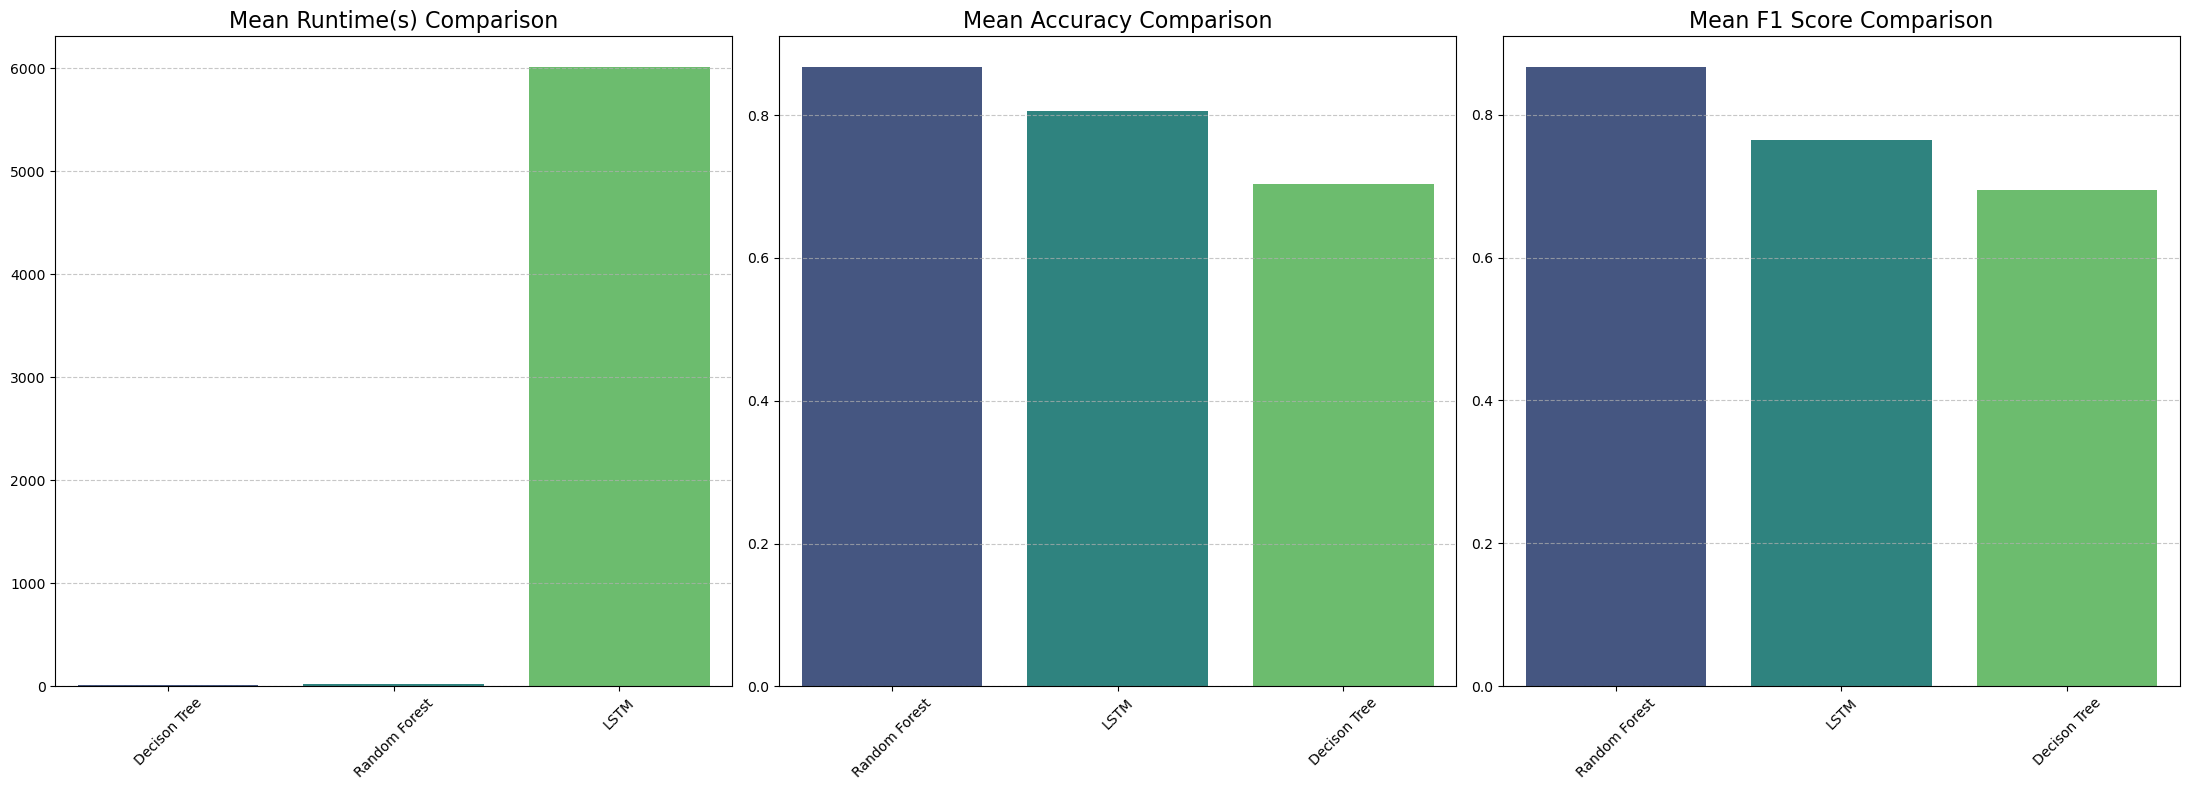

In [10]:
# Create the subplots
fig, axes = plt.subplots(1, 3, figsize=(22, 8))

# Plot for Runtime
sns.barplot(data=mean_data_runtime_sorted, x='type', y='Runtime', palette="viridis", ax=axes[0])
axes[0].set_title('Mean Runtime(s) Comparison', fontsize=16)
axes[0].set_xlabel('')
axes[0].set_ylabel('', fontsize=14)
axes[0].tick_params(axis='x', rotation=45)
axes[0].grid(axis='y', linestyle='--', alpha=0.7)

# Plot for Accuracy
sns.barplot(data=mean_data_accuracy_sorted, x='type', y='Accuracy', palette="viridis", ax=axes[1])
axes[1].set_title('Mean Accuracy Comparison', fontsize=16)
axes[1].set_xlabel('')
axes[1].set_ylabel('', fontsize=14)
axes[1].tick_params(axis='x', rotation=45)
axes[1].grid(axis='y', linestyle='--', alpha=0.7)

# Plot for F1 Score
sns.barplot(data=mean_data_f1_sorted, x='type', y='F1', palette="viridis", ax=axes[2])
axes[2].set_title('Mean F1 Score Comparison', fontsize=16)
axes[2].set_xlabel('')
axes[2].set_ylabel('', fontsize=14)
axes[2].tick_params(axis='x', rotation=45)
axes[2].grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()